In [1]:
!pip install scikit-image


^C


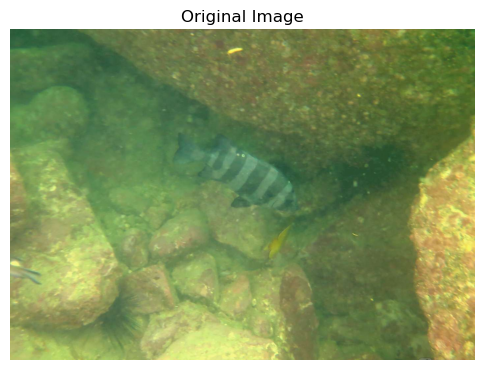

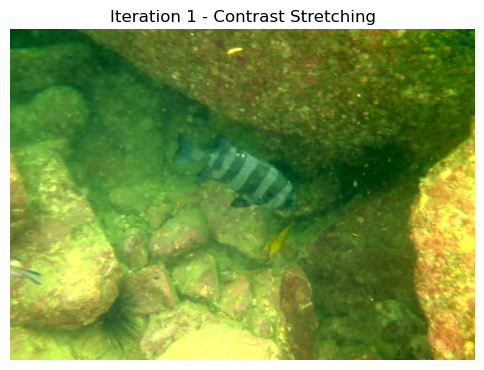

Iteration 1 - Step: contrast stretching
PSNR: 20.16
SSIM: 0.87


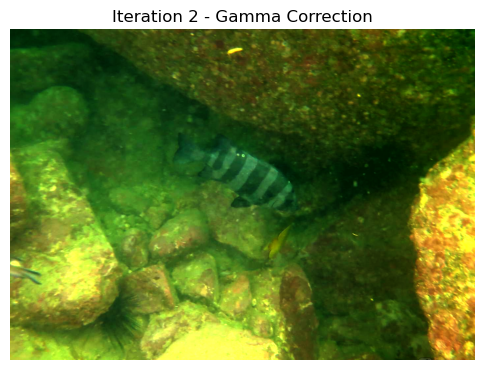

Iteration 2 - Step: gamma correction
PSNR: 14.47
SSIM: 0.67


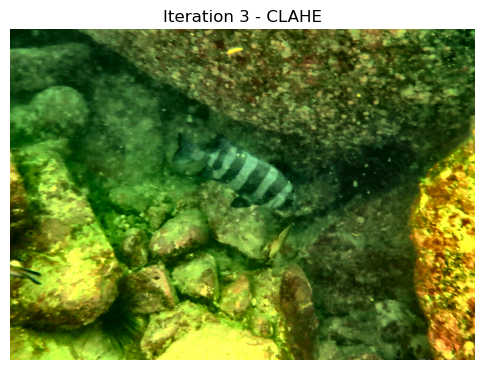

Iteration 3 - Step: clahe
PSNR: 14.56
SSIM: 0.59


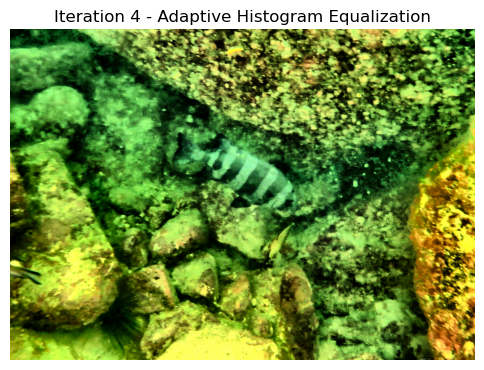

Iteration 4 - Step: adaptive histogram equalization
PSNR: 13.22
SSIM: 0.44


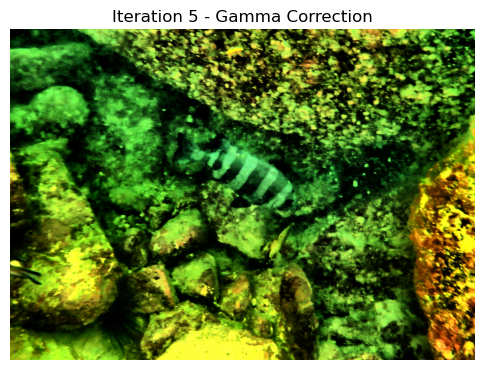

Iteration 5 - Step: gamma correction
PSNR: 11.56
SSIM: 0.35

Summary of Evaluation Metrics for Each Step:
Iteration 1 - Step: contrast stretching
PSNR: 20.16, SSIM: 0.87
Iteration 2 - Step: gamma correction
PSNR: 14.47, SSIM: 0.67
Iteration 3 - Step: clahe
PSNR: 14.56, SSIM: 0.59
Iteration 4 - Step: adaptive histogram equalization
PSNR: 13.22, SSIM: 0.44
Iteration 5 - Step: gamma correction
PSNR: 11.56, SSIM: 0.35


In [9]:
from skimage import io, exposure, color
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_ubyte

# Load the image
image_path = 'C:/Users/kusum/Desktop/raw-890/748_img_.png'

image = io.imread(image_path)

# Convert to uint8 if needed
if image.dtype == np.float32 or image.dtype == np.float64:
    image = (image * 255).astype(np.uint8)

# Initial Parameters for Processing
gamma_value = 1.5

# Define Enhancement Functions
def contrast_stretching(image):
    p2, p98 = np.percentile(image, (2, 98))
    stretched_image = exposure.rescale_intensity(image, in_range=(p2, p98))
    return img_as_ubyte(stretched_image)

def gamma_correction(image, gamma):
    corrected_image = exposure.adjust_gamma(image, gamma)
    return img_as_ubyte(corrected_image)

def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    merged_lab = cv2.merge((cl, a, b))
    clahe_image = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2RGB)
    return clahe_image

def adaptive_histogram_equalization(image):
    equalized_image = exposure.equalize_adapthist(image, clip_limit=0.03)
    return img_as_ubyte(equalized_image)

# Define Processing Sequence
# You can change the sequence below to use any enhancement function in any order
steps = ["contrast stretching", "gamma correction", "clahe", "adaptive histogram equalization", "gamma correction"]

# Display the Original Image Properly Without Extra Axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)
ax.set_title('Original Image')
ax.axis('off')  # Remove axis labels and ticks
plt.show()

# Process the Image Step-by-Step
processed_image = np.copy(image)

# Store metrics for each step
metric_results = []

for i, step in enumerate(steps):
    if step == "contrast stretching":
        processed_image = contrast_stretching(processed_image)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - Contrast Stretching')
        plt.axis('off')
        plt.show()

    elif step == "gamma correction":
        processed_image = gamma_correction(processed_image, gamma_value)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - Gamma Correction')
        plt.axis('off')
        plt.show()

    elif step == "clahe":
        processed_image = apply_clahe(processed_image)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - CLAHE')
        plt.axis('off')
        plt.show()

    elif step == "adaptive histogram equalization":
        processed_image = adaptive_histogram_equalization(processed_image)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - Adaptive Histogram Equalization')
        plt.axis('off')
        plt.show()

    # Convert to uint8 if needed for evaluation metrics
    if processed_image.dtype == np.float32 or processed_image.dtype == np.float64:
        processed_image = (processed_image * 255).astype(np.uint8)

    # Calculate Evaluation Metrics After Each Step
    current_psnr = psnr(image, processed_image, data_range=processed_image.max() - processed_image.min())
    
    # Updated SSIM Calculation with channel_axis to avoid errors
    current_ssim = ssim(image, processed_image, win_size=5, channel_axis=-1)
    
    metric_results.append((i + 1, step, current_psnr, current_ssim))

    # Print the metrics for the current step
    print(f"Iteration {i + 1} - Step: {step}")
    print(f"PSNR: {current_psnr:.2f}")
    print(f"SSIM: {current_ssim:.2f}")
    print("=" * 50)

# Display Summary of Metrics
print("\nSummary of Evaluation Metrics for Each Step:")
for result in metric_results:
    iteration, step, psnr_value, ssim_value = result
    print(f"Iteration {iteration} - Step: {step}")
    print(f"PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.2f}")
    print("=" * 50)


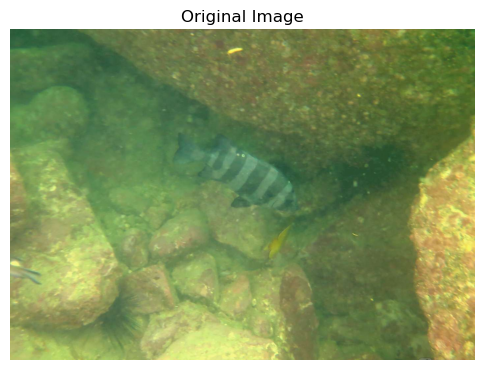

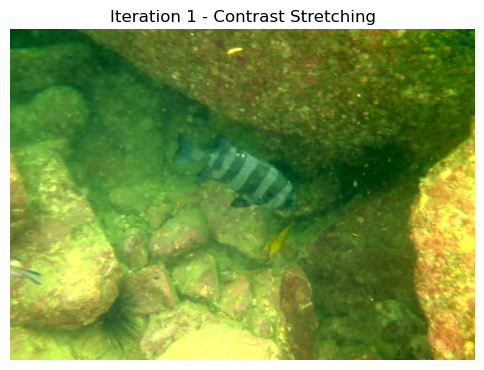

Iteration 1 - Step: contrast stretching
PSNR: 20.16
SSIM: 0.87


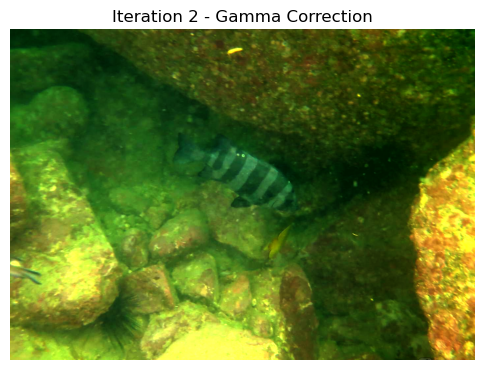

Iteration 2 - Step: gamma correction
PSNR: 14.47
SSIM: 0.67


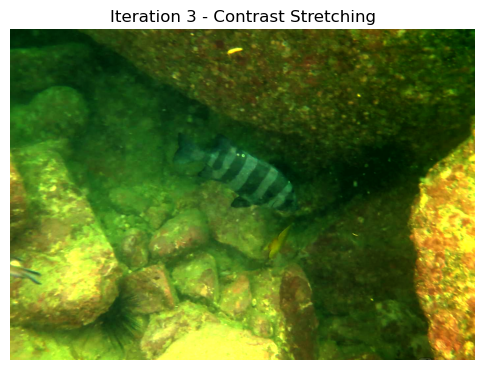

Iteration 3 - Step: contrast stretching
PSNR: 14.47
SSIM: 0.67


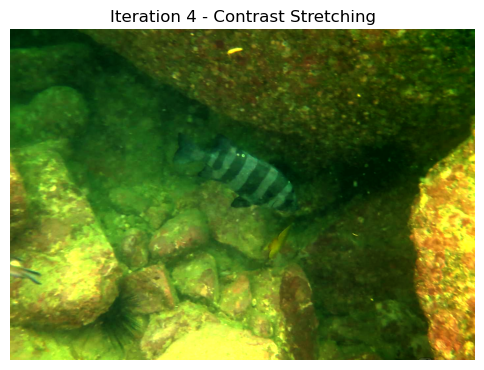

Iteration 4 - Step: contrast stretching
PSNR: 14.47
SSIM: 0.67


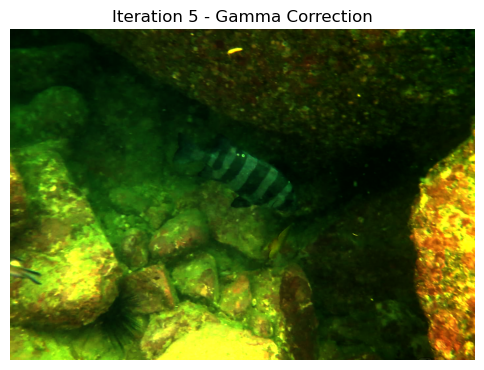

Iteration 5 - Step: gamma correction
PSNR: 11.22
SSIM: 0.42

Summary of Evaluation Metrics for Each Step:
Iteration 1 - Step: contrast stretching
PSNR: 20.16, SSIM: 0.87
Iteration 2 - Step: gamma correction
PSNR: 14.47, SSIM: 0.67
Iteration 3 - Step: contrast stretching
PSNR: 14.47, SSIM: 0.67
Iteration 4 - Step: contrast stretching
PSNR: 14.47, SSIM: 0.67
Iteration 5 - Step: gamma correction
PSNR: 11.22, SSIM: 0.42


In [10]:
from skimage import io, exposure, color
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_ubyte

# Load the image
image_path = 'C:/Users/kusum/Desktop/raw-890/748_img_.png'

image = io.imread(image_path)

# Convert to uint8 if needed
if image.dtype == np.float32 or image.dtype == np.float64:
    image = (image * 255).astype(np.uint8)

# Initial Parameters for Processing
gamma_value = 1.5

# Define Enhancement Functions
def contrast_stretching(image):
    p2, p98 = np.percentile(image, (2, 98))
    stretched_image = exposure.rescale_intensity(image, in_range=(p2, p98))
    return img_as_ubyte(stretched_image)

def gamma_correction(image, gamma):
    corrected_image = exposure.adjust_gamma(image, gamma)
    return img_as_ubyte(corrected_image)

def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    merged_lab = cv2.merge((cl, a, b))
    clahe_image = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2RGB)
    return clahe_image

def adaptive_histogram_equalization(image):
    equalized_image = exposure.equalize_adapthist(image, clip_limit=0.03)
    return img_as_ubyte(equalized_image)

# Define Processing Sequence
# You can change the sequence below to use any enhancement function in any order
steps = ["contrast stretching", "gamma correction",  "contrast stretching","contrast stretching","gamma correction"]

# Display the Original Image Properly Without Extra Axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image)
ax.set_title('Original Image')
ax.axis('off')  # Remove axis labels and ticks
plt.show()

# Process the Image Step-by-Step
processed_image = np.copy(image)

# Store metrics for each step
metric_results = []

for i, step in enumerate(steps):
    if step == "contrast stretching":
        processed_image = contrast_stretching(processed_image)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - Contrast Stretching')
        plt.axis('off')
        plt.show()

    elif step == "gamma correction":
        processed_image = gamma_correction(processed_image, gamma_value)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - Gamma Correction')
        plt.axis('off')
        plt.show()

    elif step == "clahe":
        processed_image = apply_clahe(processed_image)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - CLAHE')
        plt.axis('off')
        plt.show()

    elif step == "adaptive histogram equalization":
        processed_image = adaptive_histogram_equalization(processed_image)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - Adaptive Histogram Equalization')
        plt.axis('off')
        plt.show()

    # Convert to uint8 if needed for evaluation metrics
    if processed_image.dtype == np.float32 or processed_image.dtype == np.float64:
        processed_image = (processed_image * 255).astype(np.uint8)

    # Calculate Evaluation Metrics After Each Step
    current_psnr = psnr(image, processed_image, data_range=processed_image.max() - processed_image.min())
    
    # Updated SSIM Calculation with channel_axis to avoid errors
    current_ssim = ssim(image, processed_image, win_size=5, channel_axis=-1)
    
    metric_results.append((i + 1, step, current_psnr, current_ssim))

    # Print the metrics for the current step
    print(f"Iteration {i + 1} - Step: {step}")
    print(f"PSNR: {current_psnr:.2f}")
    print(f"SSIM: {current_ssim:.2f}")
    print("=" * 50)

# Display Summary of Metrics
print("\nSummary of Evaluation Metrics for Each Step:")
for result in metric_results:
    iteration, step, psnr_value, ssim_value = result
    print(f"Iteration {iteration} - Step: {step}")
    print(f"PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.2f}")
    print("=" * 50)


In [6]:
"contrast stretching", "gamma correction",  "gamma correction","contrast stretching","contrast stretching","gamma correction"

('contrast stretching',
 'gamma correction',
 'gamma correction',
 'contrast stretching',
 'contrast stretching',
 'gamma correction')